In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 1D fourier transform 

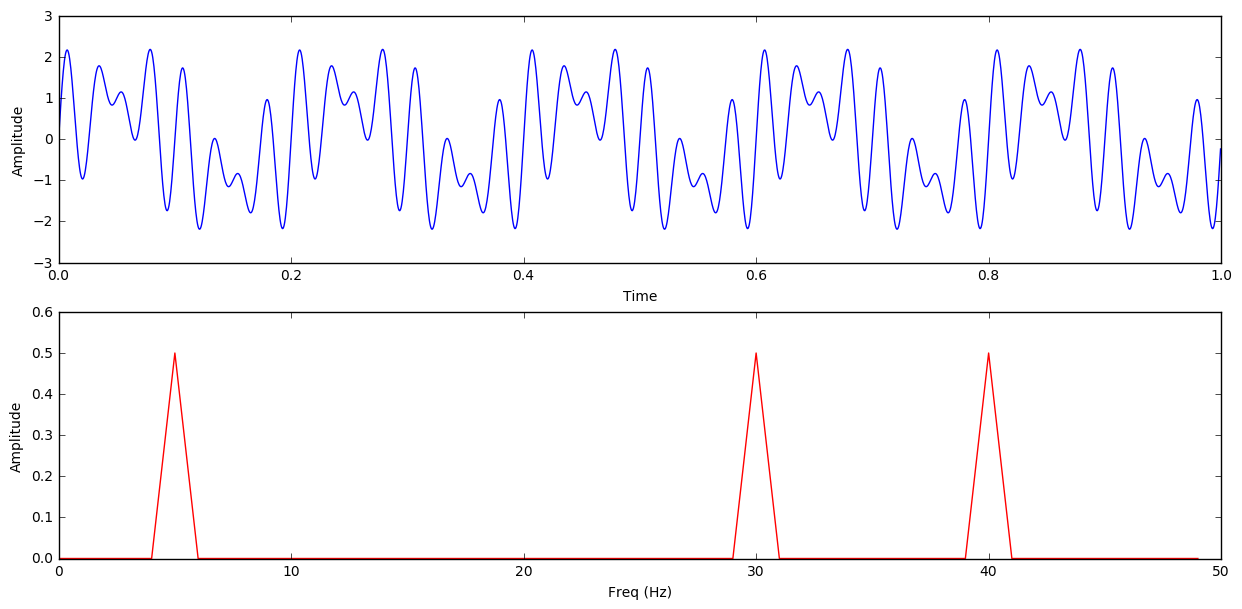

In [2]:
fs = 2000.0;  # sampling rate
ts = 1.0/fs;  # sampling interval
t = np.arange(0,1,ts) # time vector

# Signal of f={5,30,40}
y = np.sin(2*np.pi*5*t) + np.sin(2*np.pi*30*t) + + np.sin(2*np.pi*40*t)

n = len(y) # length of the signal
k = np.arange(n)
i = n/fs
frq = k/i # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
plt.plot(t,y), plt.xlabel('Time'), plt.ylabel('Amplitude')

plt.subplot(2,1,2)
#plt.plot(frq,abs(Y),'r')
plt.plot(frq[0:50],abs(Y)[0:50],'r')
plt.xlabel('Freq (Hz)'), plt.ylabel('Amplitude')
plt.show()

## Low pass filter

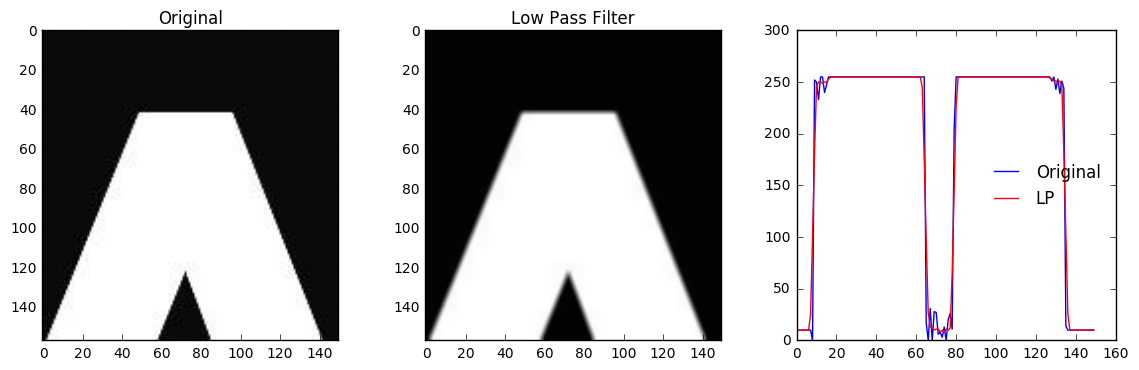

In [3]:
img = cv2.imread("images/A.png", 0)
lf = np.ones((3,3))
lf /= np.sum(lf)
filtered_img = cv2.filter2D(img,-1,lf)

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray'), plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(filtered_img,cmap='gray'), plt.title('Low Pass Filter')

plt.subplot(1,3,3)
plt.plot(img[140], label='Original')
plt.plot(filtered_img[140], label='LP', c='r')
plt.legend(loc='center right', frameon=False)

plt.show()

## High pass filter

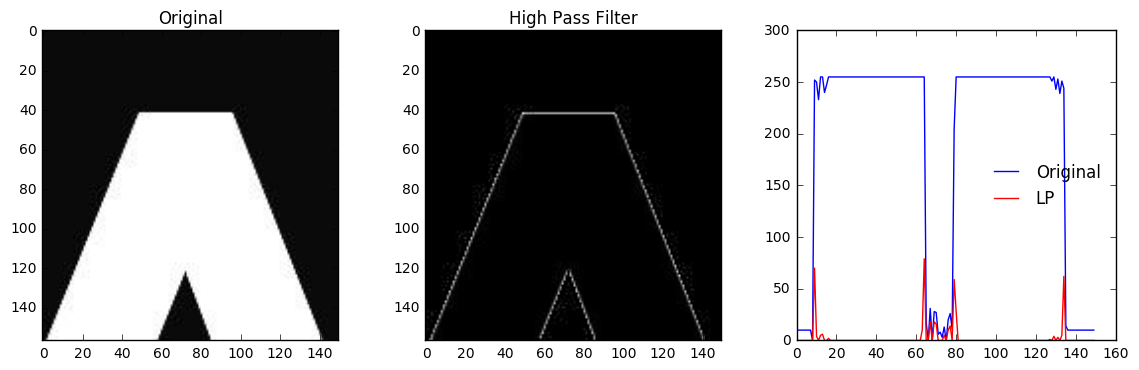

In [10]:
lf = np.ones((3,3))*-1
lf[1,1] = 8
lf /= 9
filtered_img = cv2.filter2D(img,-1,lf)

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray'), plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(filtered_img,cmap='gray'), plt.title('High Pass Filter')

plt.subplot(1,3,3)
plt.plot(img[140], label='Original')
plt.plot(filtered_img[140], label='LP', c='r')
plt.legend(loc='center right', frameon=False)

plt.show()

## Low Pass filter in frequencey/fourier domain

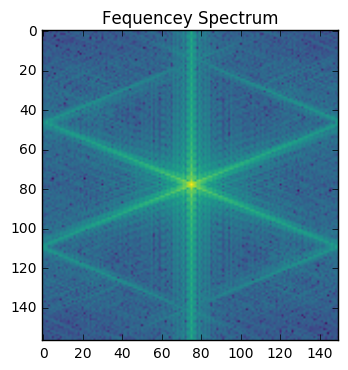

In [6]:
img = cv2.imread("images/A.png", 0)

ftimage = np.fft.fft2(img)
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.log(1 + np.abs(ftimage)), cmap='viridis'), plt.title('Fequencey Spectrum')
plt.show()

## Low pass Filter

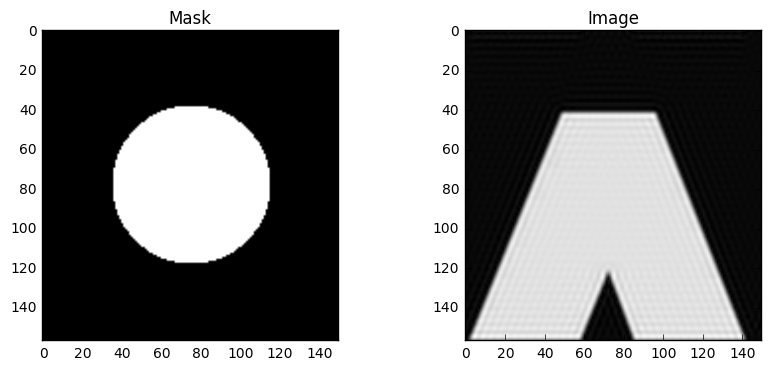

In [8]:
from skimage import draw

rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

radius = 40
mask =np.zeros((rows,cols),np.uint8)
ri, ci = draw.circle(crow, ccol, radius=radius, shape=mask.shape)
mask[ri,ci]=1

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(np.abs(mask), cmap='gray'), plt.title("Mask")

# Convolution in time domain == Multiplication in frequencey domain
ftimagep = ftimage * mask
f_ishift = np.fft.ifftshift(ftimagep)
imagep = np.fft.ifft2(f_ishift)
imagep = np.abs(imagep)

plt.subplot(1,2,2)
plt.imshow(np.abs(imagep), cmap='gray'), plt.title("Image")
plt.show()

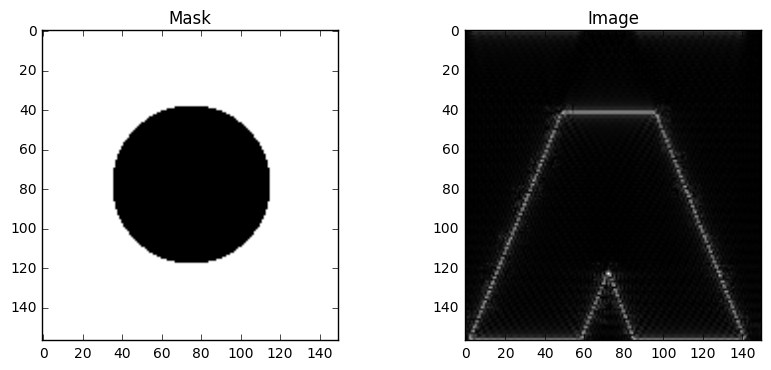

In [9]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

radius = 40
mask =np.ones((rows,cols),np.uint8)
ri, ci = draw.circle(crow, ccol, radius=radius, shape=mask.shape)
mask[ri,ci]=0

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(np.abs(mask), cmap='gray'), plt.title("Mask")

# Convolution in time domain == Multiplication in frequencey domain
ftimagep = ftimage * mask
f_ishift = np.fft.ifftshift(ftimagep)
imagep = np.fft.ifft2(f_ishift)
imagep = np.abs(imagep)

plt.subplot(1,2,2)
plt.imshow(np.abs(imagep), cmap='gray'), plt.title("Image")
plt.show()